In [12]:
import pandas as pd
import numpy as np
from dateutil import parser
from datetime import datetime

print """
    The table shows the precipitation report. Color indicates the strength of precipitation probability. 
    Columns are locations.
    Rows are dates in sorted order.
    Higher precipitation probability are darker in color
    The probability of precipitation occurence was highest in 4 locations:  
    1.Corn Exchange Street
    2.King's Road
    3.Patchway
    4.Waterside
    
    """

data=pd.read_csv('Data.csv')
data['formatted_date']=pd.to_datetime(data['formatted_date'],format='%m/%d/%Y')
table= pd.pivot_table(data,index=['formatted_date'],values=["precipProbability"],
                       columns=["formatted_address"],aggfunc=[np.sum],fill_value=0).applymap(lambda x: "{0:.0f}%".format(100*x))


def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    
    color = 'red'
    alpha=float(val[:-1])/100.0+0.3
    return 'font-color:"black";background-color: %s; opacity: %f; ' %(color,alpha)


s = table.style.applymap(color_negative_red)
s


    The table shows the precipitation report. Color indicates the strength of precipitation probability. 
    Columns are locations.
    Rows are dates in sorted order.
    Higher precipitation probability are darker in color
    The probability of precipitation occurence was highest in 4 locations:  
    1.Corn Exchange Street
    2.King's Road
    3.Patchway
    4.Waterside
    
    


In [53]:
import pandas as pd
import numpy as np
from dateutil import parser
from datetime import datetime

print """
    The table shows the precipitationtype report. Color indicates the type of precipitation. 
    Columns are locations.
    Rows are dates in sorted order.
    rain is blue and snow is grey
    Most of the precipitation has been in the form of rain with few days snowing
    """

data=pd.read_csv('Data.csv')
pt_data=data.loc[:,['formatted_date','formatted_address','precipType']]
table= pd.pivot_table(pt_data,index=['formatted_date'], columns=["formatted_address"],values=["precipType"],
                      aggfunc=lambda x: ' '.join(str(v) for v in x))


def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if val=='snow':
        color = 'grey'
    elif val=='rain':
        color='lightblue'
    else:
        color='white'
    
    return 'background-color: %s' % color 

s = table.style.applymap(color_negative_red)
s


    The table shows the precipitationtype report. Color indicates the type of precipitation. 
    Columns are locations.
    Rows are dates in sorted order.
    rain is blue and snow is grey
    Most of the precipitation has been in the form of rain with few days snowing
    


In [58]:
import pandas as pd
import numpy as np
from dateutil import parser
from datetime import datetime

print """
    The table shows the number of days it has rained and snowed in the given time period.
    
    1. Central Ave,High St,King's Rd,Watford and Wolsey Walk received snow for 1 day
    2. Christopher Pl,Leeds and The Grove received snow for 2 days
    """

data=pd.read_csv('Data.csv')
data.describe()
count_data=data.loc[:,['formatted_address','precipType','formatted_date']]

df=count_data.groupby(['formatted_address','precipType']).count() 
df




    The table shows the number of days it has rained and snowed in the given time period.
    
    1. Central Ave,High St,King's Rd,Watford and Wolsey Walk received snow for 1 day
    2. Christopher Pl,Leeds and The Grove received snow for 2 days
    


formatted_date
formatted_address                                  precipType                
Bedford St, Exeter EX1 1GJ, UK                     rain                    23
Central Ave, West Bridgford, Nottingham NG2 5GR... rain                    19
                                                   snow                     3
Chiswick High Rd, Chiswick, London W4 5TA, UK      rain                    11
Christopher Pl, St Albans AL3 5DQ, UK              rain                    27
                                                   snow                     2
Corn Exchange St, Cambridge CB2 3QF, UK            rain                     9
Garrick St, London WC2E 9BH, UK                    rain                     9
High St, Bromley BR1 1DN, UK                       rain                    28
                                                   snow                     1
Holland St, London SE1 9FU, UK                     rain                    22
Jubilee St, Brighton BN1 1GE, UK                   rain                     9
King's Rd, Reading RG1 3EY, UK                     rain                    11
                                                   snow                     1
Lambeth, London SE1 7LY, UK                        rain                    17
Leeds LS1 5AY, UK                                  rain                    25
                                                   snow                     2
Longford, Hounslow TW6 3XA, UK                     rain                     7
Muswell Hill Broadway, London N10 1BY, UK          rain                    17
Patchway, Bristol BS34 5DG, UK                     rain                     6
Southampton SO15 1QF, UK                           rain                     7
The Grove, Ilkley LS29 9PA, UK                     rain                    21
                                                   snow                     2
Waterside, Stratford-upon-Avon CV37 6BA, UK        rain                     6
Watford WD17, UK                                   rain                    21
                                                   snow                     1
Wolsey Walk, Woking GU21 6XX, UK                   rain                    26
                                                   snow                     1

In [62]:
import pandas as pd
import numpy as np
from dateutil import parser
from datetime import datetime
print """
    Descriptive staistics for each variable:
    This is useful to get a quick overview of max, min, mean, standard deviation and the distribution for tempereture varialbes,
    wind speed, humidity, pressure, dew point, visibility, humidity and cloud cover
    """
data=pd.read_csv('Data.csv')
des_data=data.loc[:,['precipIntensity','precipIntensityMax','apparentTemperatureMin','temperatureMin','apparentTemperatureMax','temperatureMax',
                    'dewPoint','humidity','windSpeed','windBearing','visibility','cloudCover','pressure']]
des_data.describe()



    Descriptive staistics for each variable:
    This is useful to get a quick overview of max, min, mean, standard deviation and the distribution for tempereture varialbes,
    wind speed, humidity, pressure, dew point, visibility, humidity and cloud cover
    


,precipIntensity,precipIntensityMax,apparentTemperatureMin,temperatureMin,apparentTemperatureMax,temperatureMax,dewPoint,humidity,windSpeed,windBearing,visibility,cloudCover,pressure
count,66.000000,63.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,351.000000,367.000000
mean,0.106847,2.151203,34.898774,40.349809,45.454251,48.451935,40.428311,0.864659,10.609918,193.326975,6.195613,0.603789,1013.701798
std,0.202186,3.447990,6.853402,5.545033,8.400433,5.803976,5.439124,0.060121,4.545854,79.148728,1.710711,0.262653,12.758367
min,0.000000,0.000000,22.950000,28.870000,27.460000,34.480000,29.560000,0.650000,0.580000,9.000000,2.200000,0.000000,984.500000
25%,0.000000,0.000000,29.350000,36.035000,39.985000,45.695000,35.650000,0.840000,7.365000,160.000000,5.095000,0.435000,1005.760000
50%,0.000100,0.011100,34.330000,40.360000,45.290000,49.570000,41.060000,0.870000,10.400000,221.000000,6.750000,0.620000,1016.060000
75%,0.128300,3.730000,39.705000,43.910000,52.120000,52.120000,43.975000,0.900000,13.890000,249.000000,7.450000,0.820000,1024.260000
max,0.796300,10.220000,51.780000,51.780000,63.500000,63.500000,50.270000,0.980000,21.720000,353.000000,9.560000,1.000000,1030.230000



    The line chart below shows the maximum temperature trend for all the locations. We can a very similar trend in most
    locations.In between 6th and 3rd Feburary the temperature was below 0 degree celsius.
    Temperatures rose to 18 degree celsius between 19th and 22nd Feburary
    


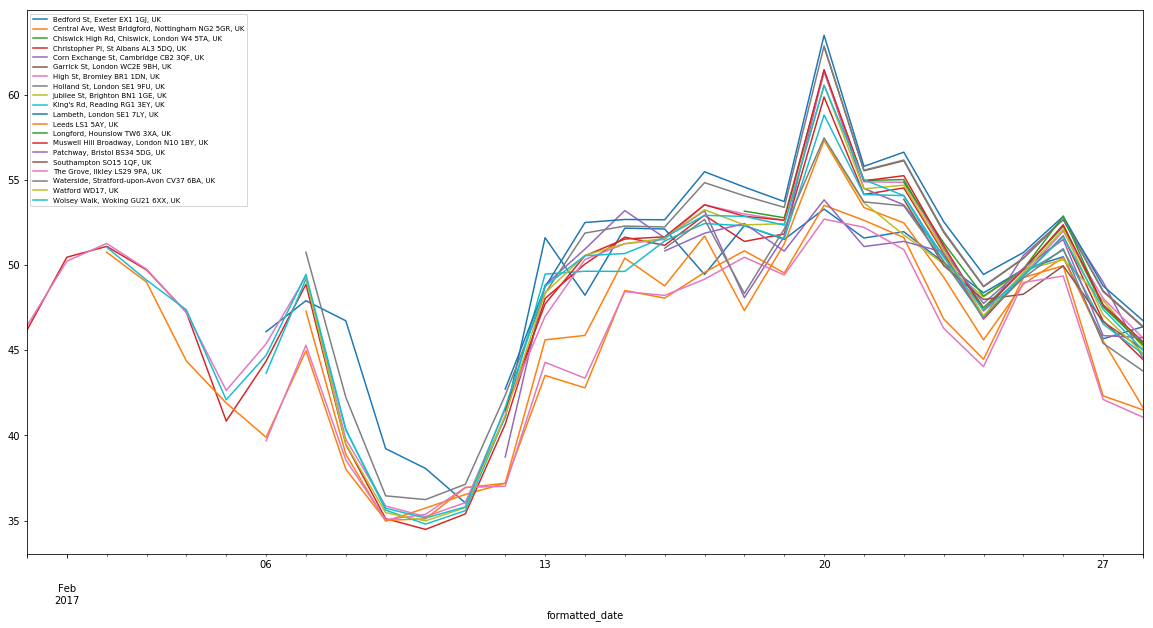

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print """
    The line chart below shows the maximum temperature trend for all the locations. We can a very similar trend in most
    locations.In between 6th and 3rd Feburary the temperature was below 0 degree celsius.
    Temperatures rose to 18 degree celsius between 19th and 22nd Feburary
    """

data=pd.read_csv('Data.csv')
fig, ax = plt.subplots(figsize=(20, 10))

labels=[]
series_data=data.loc[:,['formatted_address','formatted_date','temperatureMax']]
series_data['formatted_date']=pd.to_datetime(series_data['formatted_date'],format='%m/%d/%Y')

for key, grp in series_data.groupby(['formatted_address']):
    ax = grp.plot(ax=ax, kind='line', x='formatted_date', y='temperatureMax')
    labels.append(key)
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels,loc='best',fontsize=7)
plt.show()

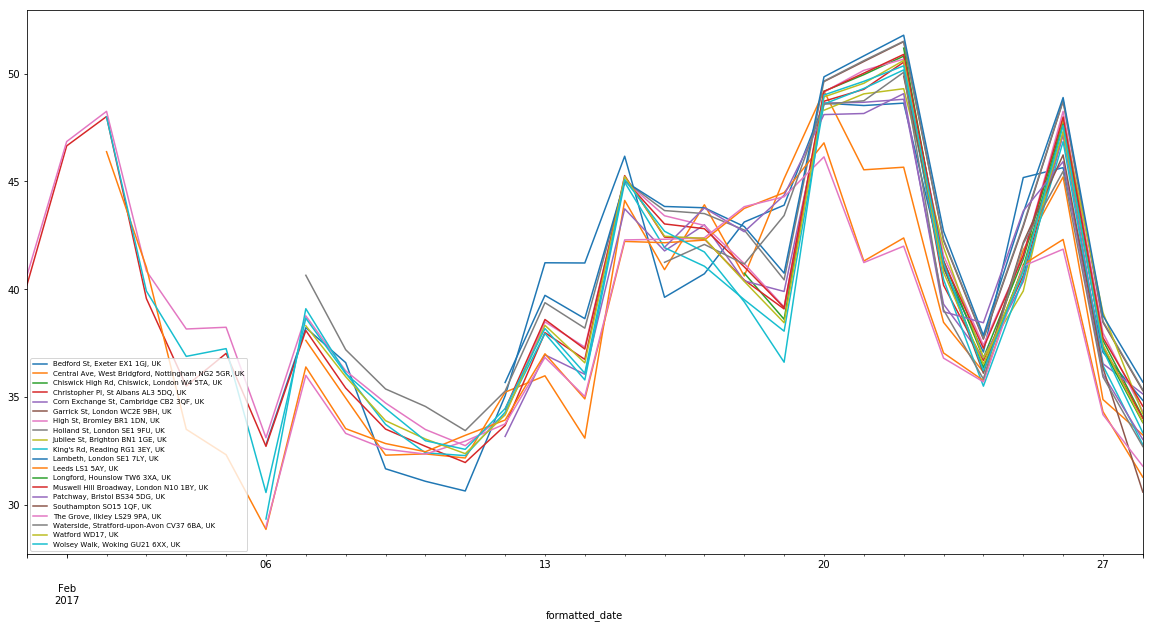

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print """
    The line chart below shows the minimum temperature trend for all the locations. Temperaures were below 0 degree celsius 
    in Leeds, Kings Road and Wolsey Walk on Feburary 6th.
    """
data=pd.read_csv('Data.csv')
fig, ax = plt.subplots(figsize=(20, 10))

labels=[]
series_data=data.loc[:,['formatted_address','formatted_date','temperatureMin']]
series_data['formatted_date']=pd.to_datetime(series_data['formatted_date'],format='%m/%d/%Y')

for key, grp in series_data.groupby(['formatted_address']):
    ax = grp.plot(ax=ax, kind='line', x='formatted_date', y='temperatureMin')
    labels.append(key)
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels,loc='best',fontsize=7)
plt.show()

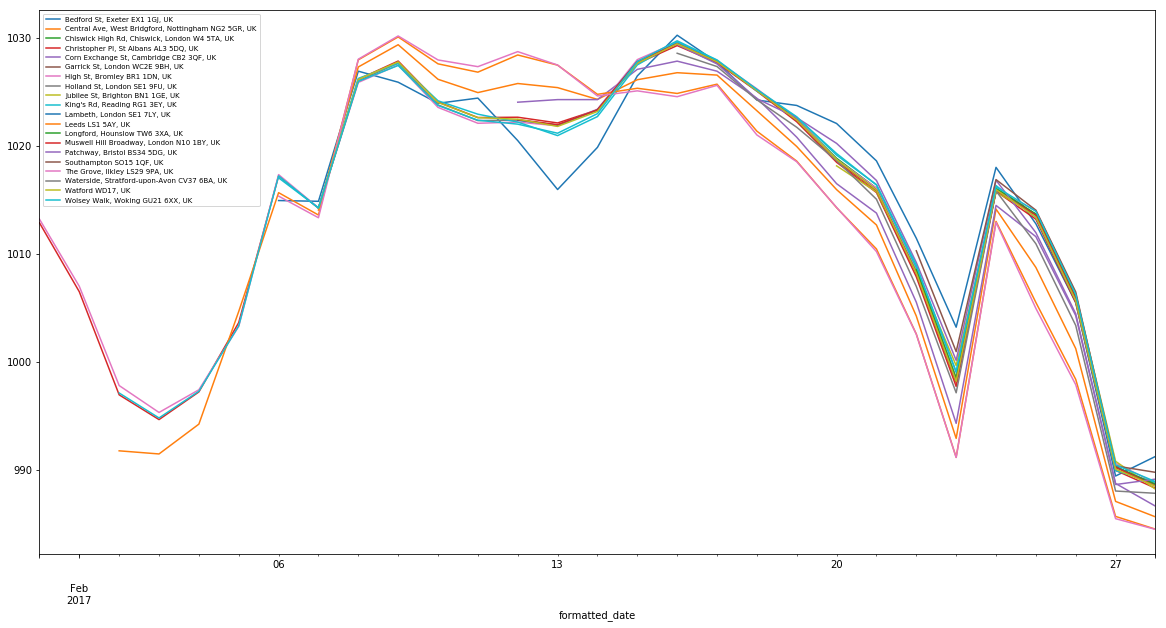

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print """
    The line chart below shows the pressure trend for all the locations.Pressure was higher when temperaures were closer to 0 degree celsius 
    but as the weather got hot pressure fell down. This is close to the date range 19th to 25th. This can be related to the 
    pivot table where we see precipitation probability higher for few locations. The low pressure colud have caused rainfall.
    """

data=pd.read_csv('Data.csv')
fig, ax = plt.subplots(figsize=(20, 10))

labels=[]
series_data=data.loc[:,['formatted_address','formatted_date','pressure']]
series_data['formatted_date']=pd.to_datetime(series_data['formatted_date'],format='%m/%d/%Y')

for key, grp in series_data.groupby(['formatted_address']):
    ax = grp.plot(ax=ax, kind='line', x='formatted_date', y='pressure')
    labels.append(key)
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels,loc='best',fontsize=7)
plt.show()

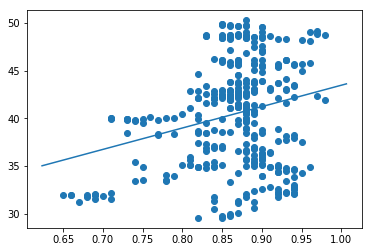

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Data.csv')
print """
    The scatter plot shows positive corellation between humidity and dew point. The more it is humid higer is the due point 
    """

def scatter_plot_with_correlation_line(x, y):
 
    # Scatter plot
    plt.scatter(x, y)

    # Add correlation line
    axes = plt.gca()
    m, b = np.polyfit(x, y, 1)
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-')

    
    plt.show()

X = []; Y = []; 
X=data['humidity'].values
Y=data['dewPoint'].values


scatter_plot_with_correlation_line(X,Y)




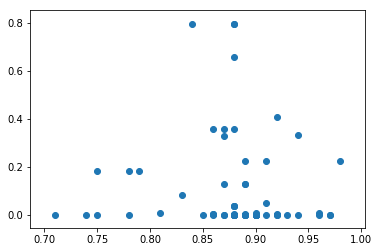

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Data.csv')

print """
    The scatter plot shows no significant corellation between humidity and precipIntensity. 
    """

def scatter_plot_with_correlation_line(x, y):
  
    # Scatter plot
    plt.scatter(x, y)

    # Add correlation line
    axes = plt.gca()
    m, b = np.polyfit(x, y, 1)
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-')

    
    plt.show()


X = []; Y = []; 
X=data['humidity'].values
Y=data['precipIntensity'].values


scatter_plot_with_correlation_line(X,Y)

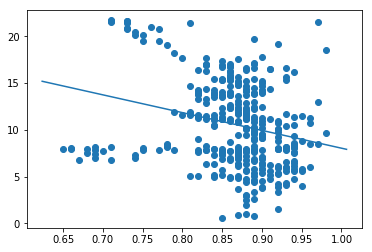

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Data.csv')
print """
    The scatter plot shows negative corellation between humidity and windspeed.  
    """

def scatter_plot_with_correlation_line(x, y):
    
    # Scatter plot
    plt.scatter(x, y)

    # Add correlation line
    axes = plt.gca()
    m, b = np.polyfit(x, y, 1)
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-')

    
    plt.show()

X = []; Y = []; 
X=data['humidity'].values
Y=data['windSpeed'].values


scatter_plot_with_correlation_line(X,Y)

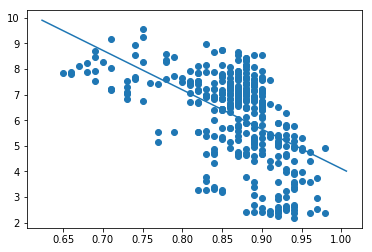

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Data.csv')

print """
    The scatter plot shows negative corellation between humidity and visibility. Visibility could bee less due to fog when the 
    temperature is lower.
    """

def scatter_plot_with_correlation_line(x, y):
   
    # Scatter plot
    plt.scatter(x, y)

    # Add correlation line
    axes = plt.gca()
    m, b = np.polyfit(x, y, 1)
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-')

    
    plt.show()
# Circle through all the keys to get the values for the maximum temperature and the
# corresponding Lat and Longs

X = []; Y = []; 
X=data['humidity'].values
Y=data['visibility'].values
# Now that those are collected, let's see what the Temperature as a function of Latitude is:

scatter_plot_with_correlation_line(X,Y)